In [1]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
import os
# Folder Path
path = r"D:\MACHINE LEARNING\Mentorship program\NLP Projects\NLP_Project_second\job_postings"

In [4]:
# # Change the directory
# os.chdir(path)
# file_list=os.listdir()
# # file_list.remove('desktop.ini')

# # Read text File 
# def read_html_file(file_path):
#     with open(file_path, encoding='utf8') as f:
#         S = BeautifulSoup(f.read(), 'lxml')
#         print(S.prettify())
# #         print(S)
# #         print(S('title'))
# #         print(S.body.prettify())

# # iterate through all file
# counter=0
# for file in file_list:
#     print(file)
#     counter=counter+1
#     # Check whether file is in text format or not
#     if file.endswith(".html"):
#         file_path = f"{path}\{file}"
  
#         # call read text file function
#         read_html_file(file_path)
# print(counter)

In [5]:
lst=[]

os.chdir(path)
file_list=os.listdir()

def read_html_file(file_path):
    with open(file_path, encoding='utf8') as f:
        S = BeautifulSoup(f.read(), 'html')
        lst.append(S.find_all('li'))
    

# iterate through all file
counter=0
for file in file_list:
#     print(file)
    counter=counter+1
    if file.endswith(".html"):
        file_path = f"{path}\{file}"
        read_html_file(file_path)
print(counter)

1459


In [6]:
lst1=[]

os.chdir(path)
file_list=os.listdir()

def read_html_file(file_path):
    with open(file_path, encoding='utf8') as f:
        S = BeautifulSoup(f.read(), 'lxml')
        lst1.append(S.find('title').contents)

# iterate through all file
counter=0
for file in file_list:
#     print(file)
    counter=counter+1
    if file.endswith(".html"):
        file_path = f"{path}\{file}"
        read_html_file(file_path)
print(counter)

1459


In [7]:
data1 = list(zip(file_list,lst1,lst))
df1 = pd.DataFrame(data1, columns = ['file_name','job_title','job_skills'])
df1
# with pd.option_context('display.max_colwidth', None):
#   display(df1['job_skills'][0])

,file_name,job_title,job_skills
0,001b92395ed0fb62.html,"[Data Scientist - Beavercreek, OH]",[[Use statistical research methods to analyze ...
1,00321a48d04fe754.html,"[Data Scientist - Seattle, WA 98101]",[[Interface with our internal engagement teams...
2,0079c11b2611349f.html,"[Data Scientist - Newark, CA]","[[ Design, develop, document and maintain mach..."
3,007d9d7b5c09d820.html,[Patient Care Assistant / PCA - Med/Surg (Faye...,[[Provides all personal care services in accor...
4,00bf37ae19c7dfd7.html,"[Data Manager / Analyst - Oakland, CA]",[[You possess excellent communication and rela...
...,...,...,...
1453,fe385aa11883568f.html,"[Data Scientist - Glen Mills, PA]","[[Use machine learning methods (e.g., cluster ..."
1454,fee42538d4a7bb9a.html,"[Data Analyst (Part-Time) - Austin, TX]",[[Performing ad-hoc statistical analysis (line...
1455,fefb9642ac28b85e.html,[Manager - Business Development (Central and E...,[[[Drive New Sales from prospective clients wi...
1456,ff0eb6d0b4da2289.html,[Natural Language Processing Undergraduate Int...,[[Design and implement experiments to test new...


In [8]:
lst2=[]
for i in range(len(df1)):
    strng = df1['job_title'][i][0].rpartition(' - ')
    lst2.append(strng[0]) 

In [9]:
df1['job_title']=lst2

In [10]:
df1.head()

,file_name,job_title,job_skills
0,001b92395ed0fb62.html,Data Scientist,[[Use statistical research methods to analyze ...
1,00321a48d04fe754.html,Data Scientist,[[Interface with our internal engagement teams...
2,0079c11b2611349f.html,Data Scientist,"[[ Design, develop, document and maintain mach..."
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,[[Provides all personal care services in accor...
4,00bf37ae19c7dfd7.html,Data Manager / Analyst,[[You possess excellent communication and rela...


In [11]:
# with pd.option_context('display.max_colwidth', None):
#   display(df1)

In [12]:
lst3={}
for i in range(len(df1)):
    lst3[i]=[]
    for j in range(len(df1['job_skills'][i])):
        strng = df1['job_skills'][i][j].text.lower()
        lst3[i].append(strng)         

In [13]:
len(lst3)

1458

In [14]:
df1['job_skills2']=lst3.values()

In [15]:
df1.head()

,file_name,job_title,job_skills,job_skills2
0,001b92395ed0fb62.html,Data Scientist,[[Use statistical research methods to analyze ...,[use statistical research methods to analyze d...
1,00321a48d04fe754.html,Data Scientist,[[Interface with our internal engagement teams...,[interface with our internal engagement teams ...
2,0079c11b2611349f.html,Data Scientist,"[[ Design, develop, document and maintain mach...","[ design, develop, document and maintain machi..."
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,[[Provides all personal care services in accor...,[provides all personal care services in accord...
4,00bf37ae19c7dfd7.html,Data Manager / Analyst,[[You possess excellent communication and rela...,[you possess excellent communication and relat...


In [16]:
lsst=[]
for i in range(len(df1)):
    st=' '.join(df1['job_skills2'][i])
    lsst.append(st)

In [17]:
df1['job_skills2']=lsst

In [18]:
df1

,file_name,job_title,job_skills,job_skills2
0,001b92395ed0fb62.html,Data Scientist,[[Use statistical research methods to analyze ...,use statistical research methods to analyze da...
1,00321a48d04fe754.html,Data Scientist,[[Interface with our internal engagement teams...,interface with our internal engagement teams a...
2,0079c11b2611349f.html,Data Scientist,"[[ Design, develop, document and maintain mach...","design, develop, document and maintain machin..."
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,[[Provides all personal care services in accor...,provides all personal care services in accorda...
4,00bf37ae19c7dfd7.html,Data Manager / Analyst,[[You possess excellent communication and rela...,you possess excellent communication and relati...
...,...,...,...,...
1453,fe385aa11883568f.html,Data Scientist,"[[Use machine learning methods (e.g., cluster ...","use machine learning methods (e.g., cluster an..."
1454,fee42538d4a7bb9a.html,Data Analyst (Part-Time),[[Performing ad-hoc statistical analysis (line...,performing ad-hoc statistical analysis (linear...
1455,fefb9642ac28b85e.html,Manager - Business Development (Central and Ea...,[[[Drive New Sales from prospective clients wi...,drive new sales from prospective clients with ...
1456,ff0eb6d0b4da2289.html,Natural Language Processing Undergraduate Inte...,[[Design and implement experiments to test new...,design and implement experiments to test new h...


In [19]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '',data)
df1['job_skills2']  = df1['job_skills2'] .apply(lambda x: cleaning_numbers(x))
df1['job_skills2'].head()

0    use statistical research methods to analyze da...
1    interface with our internal engagement teams a...
2     design, develop, document and maintain machin...
3    provides all personal care services in accorda...
4    you possess excellent communication and relati...
Name: job_skills2, dtype: object

In [20]:
import string
string.punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df1['job_skills2']=df1['job_skills2'].apply(lambda x: remove_punctuation(x))
df1['job_skills2'].head()

0    use statistical research methods to analyze da...
1    interface with our internal engagement teams a...
2     design develop document and maintain machine ...
3    provides all personal care services in accorda...
4    you possess excellent communication and relati...
Name: job_skills2, dtype: object

In [21]:
import contractions
def expanded_text(sentence):
    return contractions.fix(sentence)
    
df1['job_skills2']= df1['job_skills2'].apply(expanded_text)
df1['job_skills2'].head()

0    use statistical research methods to analyze da...
1    interface with our internal engagement teams a...
2     design develop document and maintain machine ...
3    provides all personal care services in accorda...
4    you possess excellent communication and relati...
Name: job_skills2, dtype: object

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


False

In [24]:
from nltk.tokenize import RegexpTokenizer 
def tokenize(sentence):
    return RegexpTokenizer(r'\w+').tokenize(sentence)
    
df1['job_skills2']= df1['job_skills2'].apply(tokenize)
df1.head()

,file_name,job_title,job_skills,job_skills2
0,001b92395ed0fb62.html,Data Scientist,[[Use statistical research methods to analyze ...,"[use, statistical, research, methods, to, anal..."
1,00321a48d04fe754.html,Data Scientist,[[Interface with our internal engagement teams...,"[interface, with, our, internal, engagement, t..."
2,0079c11b2611349f.html,Data Scientist,"[[ Design, develop, document and maintain mach...","[design, develop, document, and, maintain, mac..."
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,[[Provides all personal care services in accor...,"[provides, all, personal, care, services, in, ..."
4,00bf37ae19c7dfd7.html,Data Manager / Analyst,[[You possess excellent communication and rela...,"[you, possess, excellent, communication, and, ..."


In [25]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Priyambada\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
import nltk
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

df1['job_skills_lemmatized'] =df1['job_skills2'].apply(lemmatize_text)
df1['job_skills_lemmatized'] =df1['job_skills_lemmatized'].apply(' '.join)
df1.head()

,file_name,job_title,job_skills,job_skills2,job_skills_lemmatized
0,001b92395ed0fb62.html,Data Scientist,[[Use statistical research methods to analyze ...,"[use, statistical, research, methods, to, anal...",use statistical research method to analyze dat...
1,00321a48d04fe754.html,Data Scientist,[[Interface with our internal engagement teams...,"[interface, with, our, internal, engagement, t...",interface with our internal engagement team an...
2,0079c11b2611349f.html,Data Scientist,"[[ Design, develop, document and maintain mach...","[design, develop, document, and, maintain, mac...",design develop document and maintain machine l...
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,[[Provides all personal care services in accor...,"[provides, all, personal, care, services, in, ...",provides all personal care service in accordan...
4,00bf37ae19c7dfd7.html,Data Manager / Analyst,[[You possess excellent communication and rela...,"[you, possess, excellent, communication, and, ...",you posse excellent communication and relation...


In [27]:
with open(r"D:\MACHINE LEARNING\Mentorship program\NLP Projects\NLP_Project_second\resume.txt",encoding='utf8') as f:
    c=[line.strip() for line in f.readlines()]
    new_t= " ".join(c)

In [28]:
new_text=remove_punctuation(new_t)
new_text=cleaning_numbers(new_text)

In [29]:
from nltk.tokenize import RegexpTokenizer 
def tokenize(sentence):
    return RegexpTokenizer(r'\w+').tokenize(sentence)
    
res_tokens=tokenize(new_text)

In [30]:
res_tokens=[word.lower() for word in res_tokens]

In [31]:
res_tokens=" ".join(res_tokens)

In [32]:
df1.head(2)

,file_name,job_title,job_skills,job_skills2,job_skills_lemmatized
0,001b92395ed0fb62.html,Data Scientist,[[Use statistical research methods to analyze ...,"[use, statistical, research, methods, to, anal...",use statistical research method to analyze dat...
1,00321a48d04fe754.html,Data Scientist,[[Interface with our internal engagement teams...,"[interface, with, our, internal, engagement, t...",interface with our internal engagement team an...


In [33]:
df2=df1.drop('job_skills',axis=1)

In [34]:
df2=df2.drop('job_skills2',axis=1)

In [35]:
df2

,file_name,job_title,job_skills_lemmatized
0,001b92395ed0fb62.html,Data Scientist,use statistical research method to analyze dat...
1,00321a48d04fe754.html,Data Scientist,interface with our internal engagement team an...
2,0079c11b2611349f.html,Data Scientist,design develop document and maintain machine l...
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,provides all personal care service in accordan...
4,00bf37ae19c7dfd7.html,Data Manager / Analyst,you posse excellent communication and relation...
...,...,...,...
1453,fe385aa11883568f.html,Data Scientist,use machine learning method eg cluster analysi...
1454,fee42538d4a7bb9a.html,Data Analyst (Part-Time),performing adhoc statistical analysis linear r...
1455,fefb9642ac28b85e.html,Manager - Business Development (Central and Ea...,drive new sale from prospective client with an...
1456,ff0eb6d0b4da2289.html,Natural Language Processing Undergraduate Inte...,design and implement experiment to test new hy...


In [36]:
df2.rename(columns = {'job_skills_lemmatized':'job_skills'}, inplace = True)

In [37]:
df2

,file_name,job_title,job_skills
0,001b92395ed0fb62.html,Data Scientist,use statistical research method to analyze dat...
1,00321a48d04fe754.html,Data Scientist,interface with our internal engagement team an...
2,0079c11b2611349f.html,Data Scientist,design develop document and maintain machine l...
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,provides all personal care service in accordan...
4,00bf37ae19c7dfd7.html,Data Manager / Analyst,you posse excellent communication and relation...
...,...,...,...
1453,fe385aa11883568f.html,Data Scientist,use machine learning method eg cluster analysi...
1454,fee42538d4a7bb9a.html,Data Analyst (Part-Time),performing adhoc statistical analysis linear r...
1455,fefb9642ac28b85e.html,Manager - Business Development (Central and Ea...,drive new sale from prospective client with an...
1456,ff0eb6d0b4da2289.html,Natural Language Processing Undergraduate Inte...,design and implement experiment to test new hy...


In [38]:
df2.loc[1458] = ['resume.txt','resume',res_tokens]

In [39]:
df2

,file_name,job_title,job_skills
0,001b92395ed0fb62.html,Data Scientist,use statistical research method to analyze dat...
1,00321a48d04fe754.html,Data Scientist,interface with our internal engagement team an...
2,0079c11b2611349f.html,Data Scientist,design develop document and maintain machine l...
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,provides all personal care service in accordan...
4,00bf37ae19c7dfd7.html,Data Manager / Analyst,you posse excellent communication and relation...
...,...,...,...
1454,fee42538d4a7bb9a.html,Data Analyst (Part-Time),performing adhoc statistical analysis linear r...
1455,fefb9642ac28b85e.html,Manager - Business Development (Central and Ea...,drive new sale from prospective client with an...
1456,ff0eb6d0b4da2289.html,Natural Language Processing Undergraduate Inte...,design and implement experiment to test new hy...
1457,ff81a90403a3f37e.html,Political Staffer,relevant year preferred bonus one location hea...


In [40]:
specific_words  = ['using', 'ability', 'will','including','understanding','experience','improve','provide','within',' and',
                   'please','make','lotion','team','knowledge','work','year','working','skill','etc','pig','tssci','targeting',
                   'andor','familiarity','must',' ing',' one',' eg']
for stop in specific_words:
    df2['job_skills']=df2['job_skills'].str.replace(stop,'',case=False)

In [41]:
df2

,file_name,job_title,job_skills
0,001b92395ed0fb62.html,Data Scientist,use statistical research method to analyze dat...
1,00321a48d04fe754.html,Data Scientist,interface with our internal engagement client...
2,0079c11b2611349f.html,Data Scientist,design develop document maintain machine learn...
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,s all personal care service in accordance with...
4,00bf37ae19c7dfd7.html,Data Manager / Analyst,you posse excellent communication relationship...
...,...,...,...
1454,fee42538d4a7bb9a.html,Data Analyst (Part-Time),performing adhoc statistical analysis linear r...
1455,fefb9642ac28b85e.html,Manager - Business Development (Central and Ea...,drive new sale from prospective client with an...
1456,ff0eb6d0b4da2289.html,Natural Language Processing Undergraduate Inte...,design implement experiment to test new hypoth...
1457,ff81a90403a3f37e.html,Political Staffer,relevant preferred bonus location health insu...


In [42]:
tfidf_model = TfidfVectorizer(max_df=1.0, max_features=200000,min_df=0.2, stop_words='english',
                                 use_idf=True)
tfidf_matrix = tfidf_model.fit_transform(df2['job_skills'])
tfidf_matrix = tfidf_matrix.toarray()

In [43]:
from sklearn.metrics.pairwise import cosine_similarity
cos_similarity = cosine_similarity(tfidf_matrix[:],tfidf_matrix[-1].reshape(1, -1))

In [44]:
tfidf_matrix[-1].reshape(1, -1).shape

(1, 82)

In [45]:
cos_similarity

array([[0.3087238 ],
       [0.30732271],
       [0.07221114],
       ...,
       [0.01623836],
       [0.        ],
       [1.        ]])

In [46]:
df2['cos_sim']=cos_similarity

In [47]:
df2.head()

,file_name,job_title,job_skills,cos_sim
0,001b92395ed0fb62.html,Data Scientist,use statistical research method to analyze dat...,0.308724
1,00321a48d04fe754.html,Data Scientist,interface with our internal engagement client...,0.307323
2,0079c11b2611349f.html,Data Scientist,design develop document maintain machine learn...,0.072211
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,s all personal care service in accordance with...,0.000000
4,00bf37ae19c7dfd7.html,Data Manager / Analyst,you posse excellent communication relationship...,0.204894


In [48]:
df3=df2.sort_values(by='cos_sim',ascending=False)

In [49]:
df4=df3.reset_index(drop=True)

In [50]:
df4.head()

,file_name,job_title,job_skills,cos_sim
0,resume.txt,resume,developed prob simulations numpy assessed on...,1.000000
1,365fa2410e58118a.html,Physics Data Scientist,help plan develop deploy maintain the entire d...,0.576666
2,af76c6c91578d660.html,Physics Data Scientist,help plan develop deploy maintain the entire d...,0.576666
3,3848a1b91befde7e.html,"Scientist I, Bioinformatics",integrate mine clinical research data to evalu...,0.574373
4,4c4eea5dbe219011.html,"Manager/Sr. Manager, Bioinformatics",define execute analysis plan to address scient...,0.549057


In [51]:
df4=df4[df4['cos_sim']>=0.08]

In [52]:
df4.head()

,file_name,job_title,job_skills,cos_sim
0,resume.txt,resume,developed prob simulations numpy assessed on...,1.000000
1,365fa2410e58118a.html,Physics Data Scientist,help plan develop deploy maintain the entire d...,0.576666
2,af76c6c91578d660.html,Physics Data Scientist,help plan develop deploy maintain the entire d...,0.576666
3,3848a1b91befde7e.html,"Scientist I, Bioinformatics",integrate mine clinical research data to evalu...,0.574373
4,4c4eea5dbe219011.html,"Manager/Sr. Manager, Bioinformatics",define execute analysis plan to address scient...,0.549057


In [53]:
df5=df4.drop(0,axis=0)
df5=df5.reset_index(drop=True)
df5.head()

,file_name,job_title,job_skills,cos_sim
0,365fa2410e58118a.html,Physics Data Scientist,help plan develop deploy maintain the entire d...,0.576666
1,af76c6c91578d660.html,Physics Data Scientist,help plan develop deploy maintain the entire d...,0.576666
2,3848a1b91befde7e.html,"Scientist I, Bioinformatics",integrate mine clinical research data to evalu...,0.574373
3,4c4eea5dbe219011.html,"Manager/Sr. Manager, Bioinformatics",define execute analysis plan to address scient...,0.549057
4,34ba2c8c3260ea5c.html,"Manager, Applied Analytics",paid medium channel performance analysis impre...,0.540864


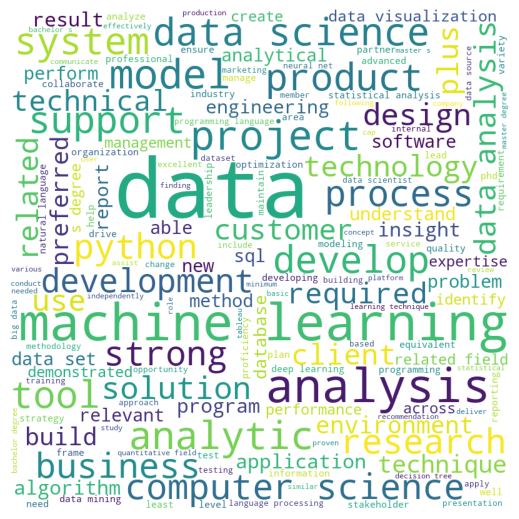

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,random_state=101).generate(" ".join(df5['job_skills']))
 
# plot the WordCloud image                      
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [55]:
vec= TfidfVectorizer(max_df=1.0, max_features=200000,min_df=0.2, stop_words='english',
                                 use_idf=True)
vec_matrix = vec.fit_transform(df5['job_skills'])
# vec_matrix = vec_matrix.toarray()

print ("In total, there are " + str(vec_matrix.shape[0]) + \
      " job postings and " + str(vec_matrix.shape[1]) + " terms.")

In total, there are 915 job postings and 101 terms.


In [56]:
from sklearn.decomposition import TruncatedSVD

In [57]:
tsvd = TruncatedSVD(n_components=50)
tsvd.fit(vec_matrix )
tsvd_mat = tsvd.transform(vec_matrix)

In [58]:
# svd = TruncatedSVD(n_components=100)
# svd.fit(vec_matrix)

# # Calculate cumulative explained variance
# explained_variance = np.cumsum(svd.explained_variance_ratio_)

# # Plot cumulative explained variance
# plt.plot(range(1,100 + 1), explained_variance, marker='o')
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.grid()
# plt.show()

In [59]:
# Set the desired explained variance threshold
# desired_variance = 0.95

# Find the minimum number of components that achieve the desired variance
# n_components = np.argmax(np.cumsum(svd.explained_variance_ratio_) >= desired_variance) + 1
# n_components

In [60]:
tsvd_mat.shape

(915, 50)

In [61]:
from sklearn.cluster import KMeans

num_clusters = 3
km = KMeans(n_clusters=num_clusters,random_state=42)
km.fit(tsvd_mat)
clusters = km.labels_.tolist()

In [62]:
len(clusters)

915

In [63]:
df5['cluster_labels']=km.labels_

In [64]:
df5.head()

,file_name,job_title,job_skills,cos_sim,cluster_labels
0,365fa2410e58118a.html,Physics Data Scientist,help plan develop deploy maintain the entire d...,0.576666,0
1,af76c6c91578d660.html,Physics Data Scientist,help plan develop deploy maintain the entire d...,0.576666,0
2,3848a1b91befde7e.html,"Scientist I, Bioinformatics",integrate mine clinical research data to evalu...,0.574373,1
3,4c4eea5dbe219011.html,"Manager/Sr. Manager, Bioinformatics",define execute analysis plan to address scient...,0.549057,1
4,34ba2c8c3260ea5c.html,"Manager, Applied Analytics",paid medium channel performance analysis impre...,0.540864,2


In [65]:
print ("Number of jobs included in each cluster:")
df5['cluster_labels'].value_counts().to_frame()

Number of jobs included in each cluster:


,cluster_labels
2,355
1,290
0,270


In [66]:
km.cluster_centers_.shape

(3, 50)

In [67]:
# print ("<Document clustering result by K-means>")

# # km.cluster_centers_ denotes the importances of each items in centroid.
# # need to sort it in descending order and get the top k items.
# order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

# Cluster_keywords_summary = {}
# for i in range(num_clusters):
#     print ("Cluster " + str(i) + " words:") 
#     Cluster_keywords_summary[i] = []
#     for ind in order_centroids[i, :10]: # get the top 20 words of each cluster
#         Cluster_keywords_summary[i].append(vec.get_feature_names()[ind])
#         print (vec.get_feature_names()[ind] + ", ")

#     cluster_jobs = df5[df5.cluster_labels == i]
#     print ("Cluster " + str(i) + " titles (" + str(len(cluster_jobs)) + " jobs): ") 
#     print()

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

def wordcloud(i):
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,random_state=101).generate(" ".join(df5[df5['cluster_labels']==i]['job_skills']))
    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

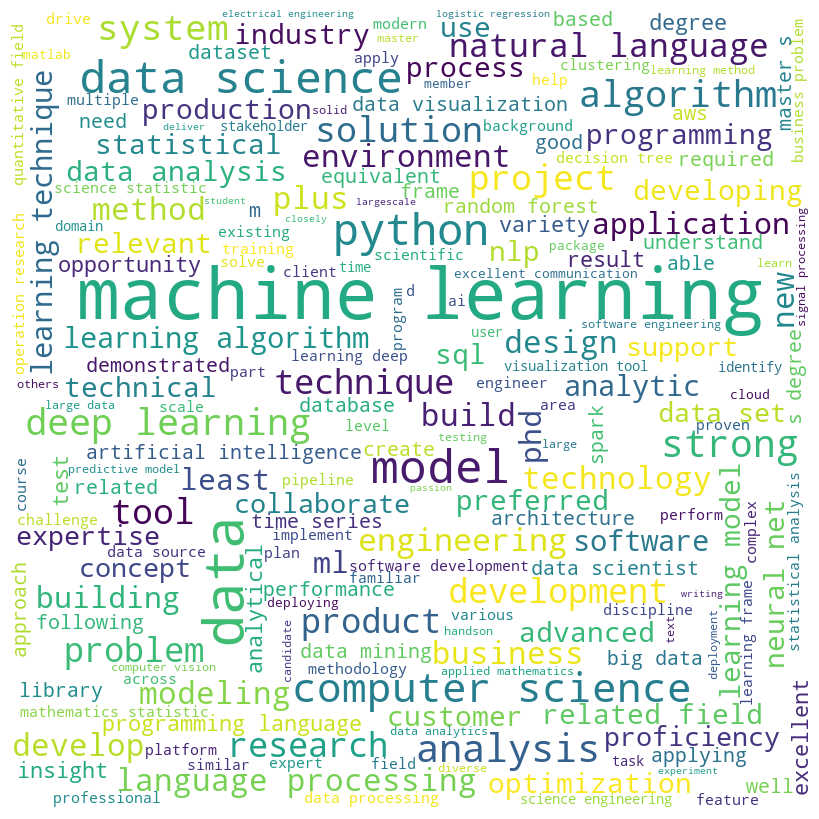

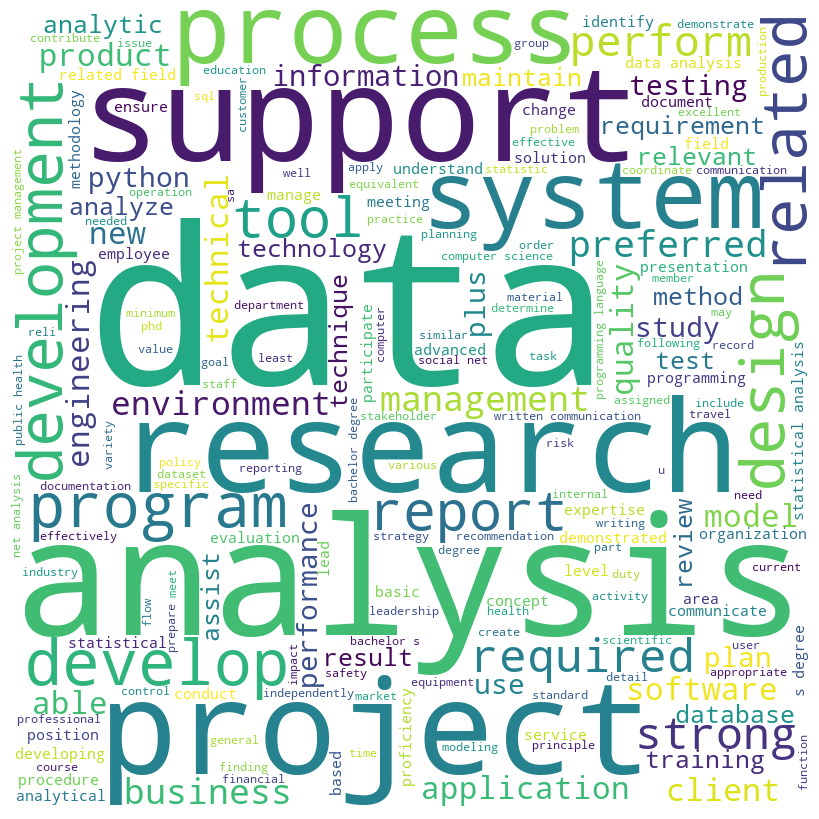

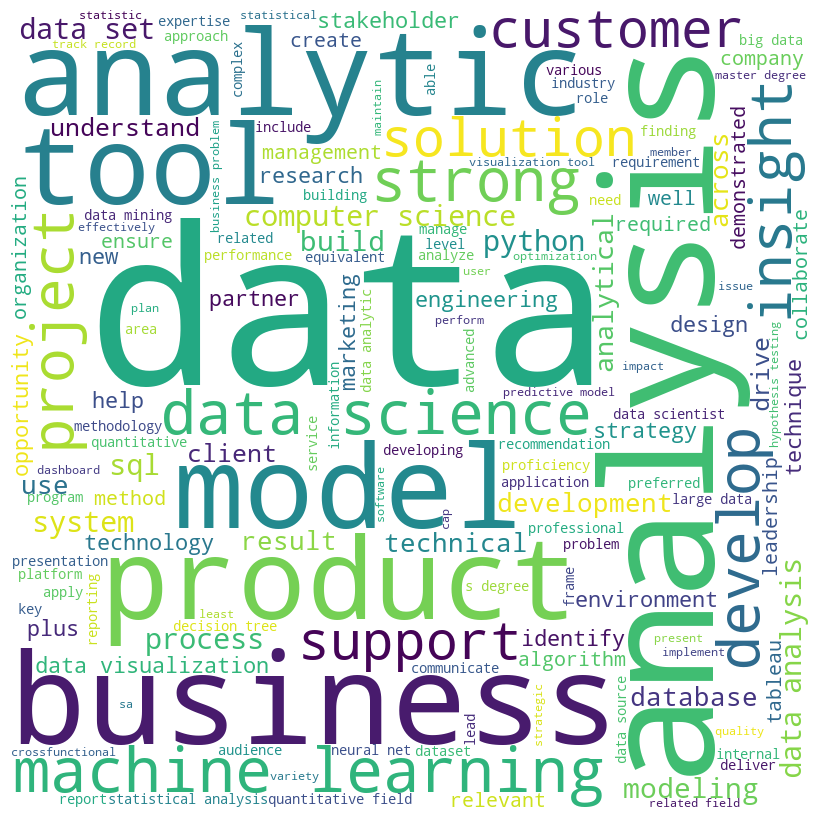

(None, None, None)

In [69]:
wordcloud(0),wordcloud(1),wordcloud(2)